<a href="https://colab.research.google.com/github/KSeungBin/python/blob/master/computational_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

$$
y = e^{2x+1}
$$
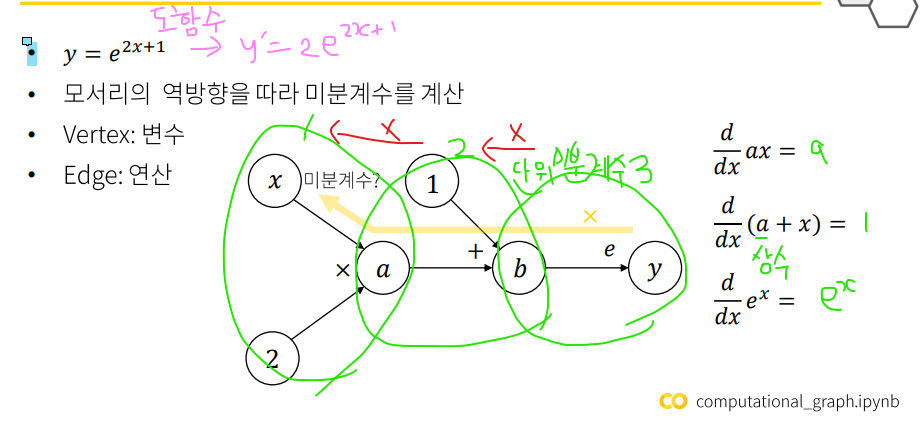

In [2]:
# 단위함수(그래프) 3개 생성
def add(x, a):
    # WRITE CODE HERE [+]
    return a+x, 1  # a + x를 x에 대해 미분하면 1

def mul(x, a):
    # WRITE CODE HERE [+]
    return a*x, a  # python에서는 return 값이 2개 이상이면 튜플 형태로 반환됨 -> retuen (a*x, a) 형태로 써도 됨
    

def exp(x):
    # WRITE CODE HERE [+]
    return np.exp(x), np.exp(x)  # e가 과학, 공학에서 중요하게 사용되는 이유 : 미분해도 값이 동일하기 때문

In [3]:
x0 = 1.5

# forwarding
# WRITE CODE HERE [+]
a, dx0 = mul(x0, 2)  # x0와 2를 곱하면 a와 미분값을 반환함
b, da = add(a,1)     # 곱셈은 교환법칙이 성립하므로 da 대신 db 넣어도 ok
y, db = exp(b)
print(f"f({x0})={y:.3f}")
print(f"f'({x0})={dx0*da*db:.3f}")

f(1.5)=54.598
f'(1.5)=109.196


In [4]:
# 역전파 알고리즘의 가장 간단한 버전 by 합성함수 미분의 연쇄법칙
# 도함수를 구하기 힘들 때, x에 대한 도함수를 구하지 않고 미분계수만 출력하는 것(단위 그래프의 단위 미분계수를 역방향으로 곱해서 전체 그래프의 미분계수를 구함)
# x를 알고 forwarding하면서 단위 함수의 함숫값을 구함 -> backward하면서 미분계수를 곱한다
np.exp(2*x0+1), 2*np.exp(2*x0+1)

(54.598150033144236, 109.19630006628847)

$$
y = \left( \frac{\sqrt{x}}{2} - 1 \right)^{-10}
$$
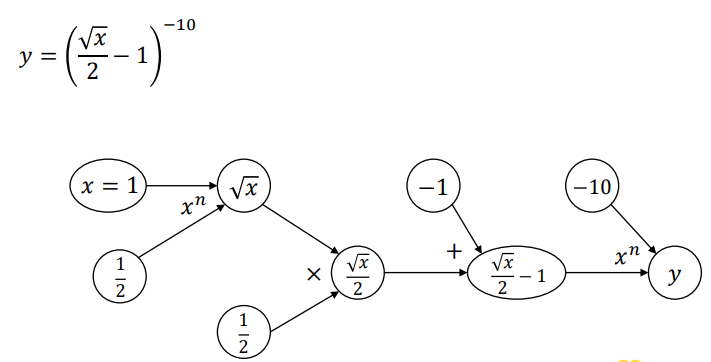

In [5]:
import sympy as S

In [6]:
x = S.Symbol('x')

# y를 symbolic하게 만들기
y = (S.sqrt(x)/2 -1)**(-10)
y   


(sqrt(x)/2 - 1)**(-10)

In [7]:
# 역전파 알고리즘을 사용하면, 이처럼 도함수를 구할 필요 없음
dy = S.diff(y, x)
dy

-5/(2*sqrt(x)*(sqrt(x)/2 - 1)**11)

In [8]:
x0 = 1
print(f"f({x0})={y.subs({x:x0})}" )   # 함숫값
print(f"f'({x0})={dy.subs({x:x0})}" ) # 미분계수

f(1)=1024
f'(1)=5120


In [9]:
def pow(x, n):
    # WRITE CODE HERE [+]
    return x**n, n**x**(n-1)

In [12]:
# 단위 함수에 대한 미분 -> 단위 미분 계수를 곱해가면서 전체 미분계수
x0 = 1

# WRITE CODE HERE [+]
a, dx0 = pow(x0, (1/2))
b, da = mul(a, (1/2)) # a에 대한 미분
c, db = add(b, -1)    # b에 대한 미분
y, dc = pow(c, -10)

print(f"f({x0})={y}")
print(f"f'({x0})={dc*db*da*dx0}")

# 원래는 forward하면서 함숫값을 구하고(to update weights), backward하면서 미분계수(gradient)를 구함
# 이 파일에서는 단위미분계수를 하나씩 곱하면 미분계수가 됨을 보여주기 위해 forward하면서 함숫값과 미분계수를 동시에 반환한 것

f(1)=1024.0
f'(1)=0.0
